<div class="alert alert-block alert-info">   

# BABS 502 Project  
#### Instructor: Martha Essak  

</div>

## Instructions and reminders for Jupyter notebooks

**Add markdown and code cells as needed to complete your project.** Please do not modify the headings of the sections.

Helpful notes abouts markdown in Jupyter to get you started:
* When you have a cell selected (by clicking on the white space to the left of the cell) in Command mode (blue box around the cell), press `a` or `b` to add a cell "above" or "below"
* In Command mode, press `d` twice to delete the cell. Press z to undo deleting a cell
* In Command mode, press `m` to change a code cell to a markdown cell, or press `y` to change a markdown cell to a code cell
* In Command mode, press `x` to cut cell, `c` to copy cell, and `v` to paste cell below the selected cell
  
* Double click a cell to enter Edit mode (green box around the cell), or press `Enter`
* Add two empty spaces at the end of a line to add a line break
* Press `shift + enter` to execute a cell to see either the formatted version (for a markdown cell) or to run the code (for a code cell). This will cause you to leave edit mode.
* Press `Ctrl + Shift + -` to split the current cell into two cells where the cursor is
* Press `Shift + m` to merge multiple cells. You can use `Shift + up arrow` or `Shift + down` arrow to select multiple cells.



[See cheat sheet for Markdown in Jupyter for more details](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd)

---

## Table of Contents
[Project description](#Description)  
[Part A: Time plot, trying transformations/adjustments, creating training and test set](#PartA)  
[Part B](#PartB)  
[Introduction & Approach](#Introduction)  
[Exploratory Data Analysis](#EDA1)  
[Potential causes of patterns](#Causes)   
[Exponential Smoothing Model](#ETS)  
[ARIMA model](#ARIMA)  
[Comparison of models](#Compare)  
[Forecasts](#Forecast)  
[Discussion](#Discussion)  


[Appendix A: ETS Models](#AppendixA)  
[Appendix B: ARIMA Models](#AppendixB)

---

<div class="alert alert-block alert-info">   
<a id="Description"></a>

# Project description

**Objective**  

The main goal of this project is to develop a model to forecast monthly energy use for the Vancouver International Airport (YVR).  

<br>

**Introduction**  

Budget planning at YVR requires forecasting the cost of energy to operate the airport. An accurate forecast could help the YVR representatives negotiate more favourable contracts with energy suppliers.

<br>

**Data Available**  

Data was taken from 14 years of records from the YVR database. This data set includes information on date, energy use, temperature, terminal area, and number of passengers. Data have been aggregated by month into 168 records (14 years with 12 months each).  

<br>


| # | Variable | Definition |  
| :- | :- | :- |  
| 1 | month | Month and year, e.g.: Nov-98 |
| 2 | energy | Energy use measured in thousands of kilowatt hours (kWh) |
| 3 | mean.temp | Mean monthly temperature outside (degrees Celsius) |
| 4 | total.area | Total area of all terminals (sq. m.) |
| 5 | total.passengers | Total number of passengers in thousands |
| 6 | domestic.passengers | Total number of domestic passengers (traveling within Canada) in thousands |
| 7 | US.passengers | Total number of passengers traveling between Canada and the US in thousands |
| 8 | international.passengers | Total number of passengers traveling between YVR and countries other than Canada/US |


In this project, you will develop appropriate models, compare the models, and discuss advantages and limitations of each model. You should select the best model and use it to provide monthly forecasts for energy use for the next three years (January 2011 through December 2013).   
    </div>

---

In [1]:
# Load necessary libraries
library(zoo)
library(MASS)
library(forecast)
library(fpp2)
library(seasonal)
library(tidyr)
library(stats)
library(tseries)
library(ggplot2)
library(lubridate)
library(dplyr)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching packages ────────────────────────────────────────────── fpp2 2.5 ──

✔ ggplot2   3.4.4     ✔ expsmooth 2.3  
✔ fma       2.5       




Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




<div class="alert alert-block alert-info">   

# Part A (3.5 marks)
## Time plot, trying transformations/adjustments, creating training and test set
### See Canvas submission called "Project: Part A" for detailed questions and points breakdown.
<a id="PartA"></a>  

</div>


### Import the data

In [2]:
energy_data <- read.csv("Energy use at YVR.csv")
energy_data

month,energy,mean.temp,total.area,total.passengers,domestic.passengers,US.passengers,international.passengers
<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Jan-97,5958,3.9,202966,1068.36,573.84,263.13,231.38
Feb-97,5859,5.0,202966,1040.30,570.36,267.39,202.56
Mar-97,5230,6.3,202966,1195.47,632.68,319.09,243.71
Apr-97,5654,9.1,202966,1086.42,599.11,265.37,221.94
May-97,5618,14.0,202966,1244.52,673.70,307.55,263.27
Jun-97,5963,15.6,202966,1352.89,729.84,333.89,289.16
Jul-97,5920,17.7,202966,1517.17,807.90,388.91,320.36
Aug-97,6430,19.0,202966,1668.83,869.27,428.65,370.91
Sep-97,6053,15.9,202966,1348.09,714.28,330.92,302.89



### Time plot

In [3]:
energy_ts <- ts(energy_data[,2], start=c(1997, 1), frequency=12)
energy_ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1997,5958,5859,5230,5654,5618,5963,5920,6430,6053,5514,5633,5545
1998,5825,5617,4970,5331,5233,5557,5841,6489,6138,5539,5667,5730
1999,6030,5954,5326,5672,5301,5777,5831,6345,6309,6068,6372,6302
2000,6570,6497,6106,6330,6070,6401,6697,7003,6760,6192,6334,6371
2001,6501,6435,5674,6206,6094,6544,6602,6886,6677,6133,6088,6291
2002,6349,6286,5588,5914,5716,6235,6483,6708,6553,5837,5961,5828
2003,6126,6020,5375,5741,5635,6199,6376,6844,6379,5822,5884,5820
2004,6105,6014,5552,5908,5956,6399,6572,7043,6418,5741,6497,6207
2005,6504,6337,5644,6148,6141,6521,6661,7387,6815,6173,6319,6434
2006,6544,6534,5809,6290,6202,6492,6733,7040,6690,6220,6497,6582


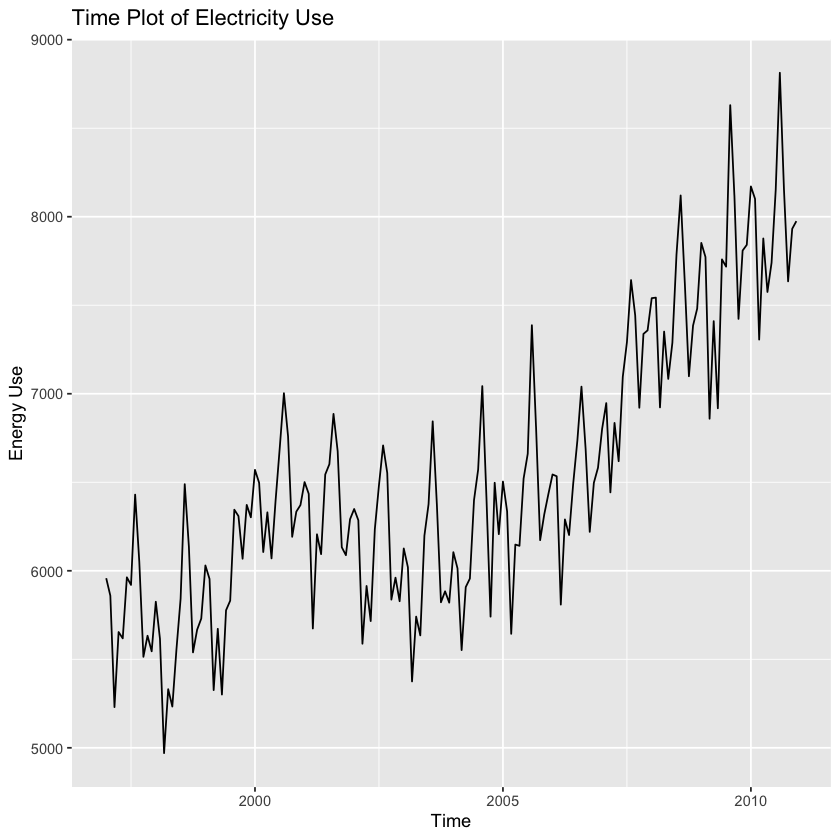

In [4]:
# Time Series Plot
autoplot(energy_ts, xlab="Time", ylab="Energy Use", main="Time Plot of Electricity Use")

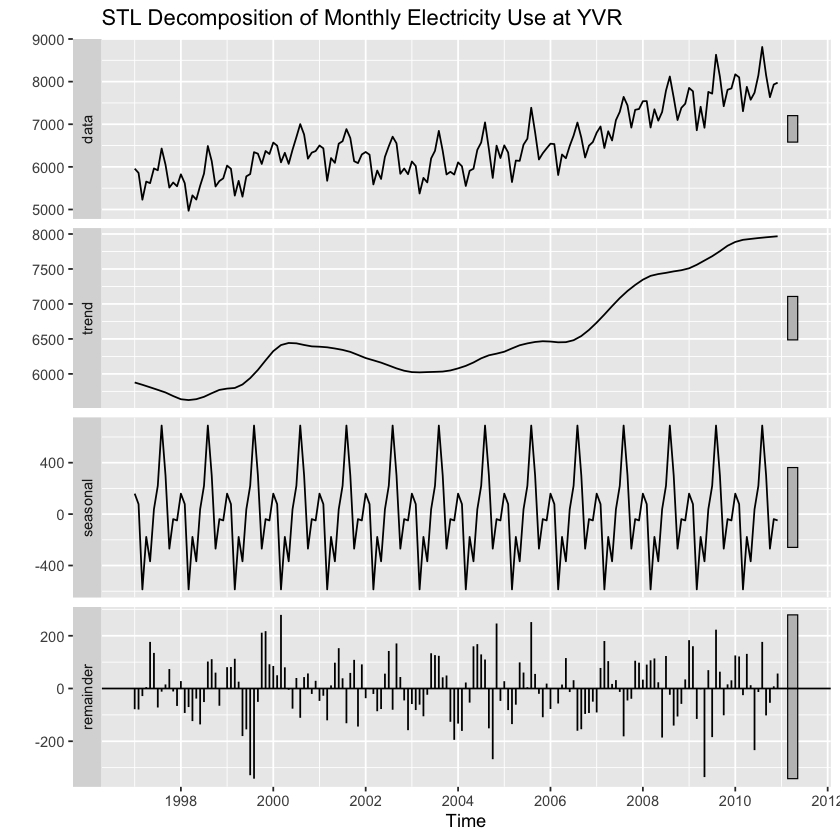

In [5]:
# STL Decomposition Plot
energy_stl <- stl(energy_ts, s.window="periodic")
autoplot(energy_stl, main="STL Decomposition of Monthly Electricity Use at YVR")


### Box-Cox transformation

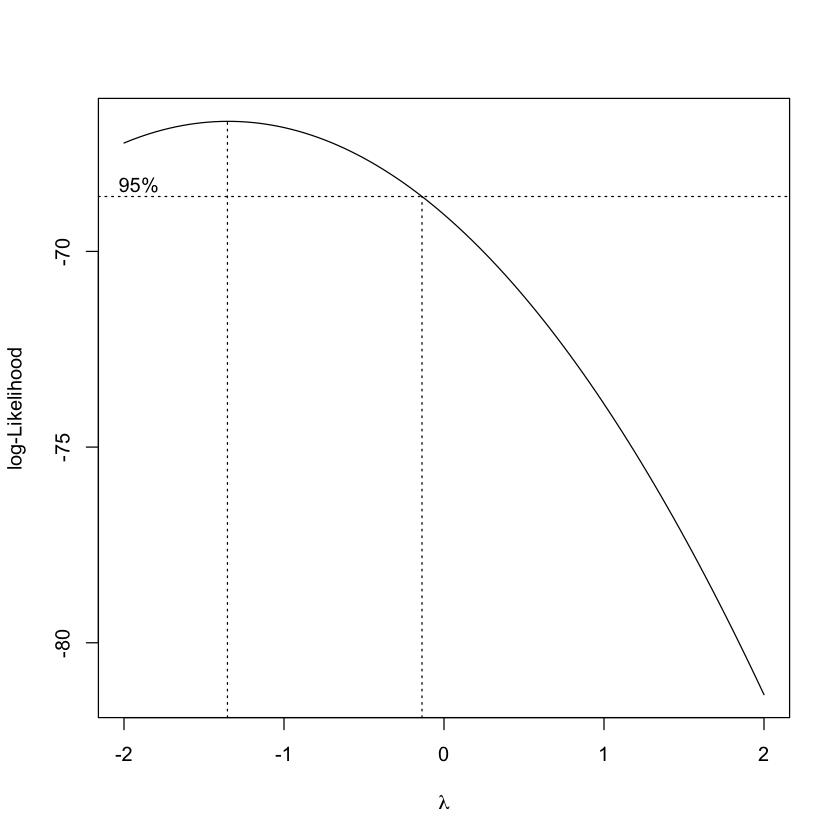

In [6]:
# Determine the optimal lambda for Box-Cox transformation
bc <- boxcox(lm(energy ~ 1, data = energy_data), lambda = seq(-2, 2, by=0.1))
lambda_optimal <- bc$x[which.max(bc$y)]

# Perform the Box-Cox transformation
energy_data$energy_transformed <- BoxCox(energy_data$energy, lambda_optimal)

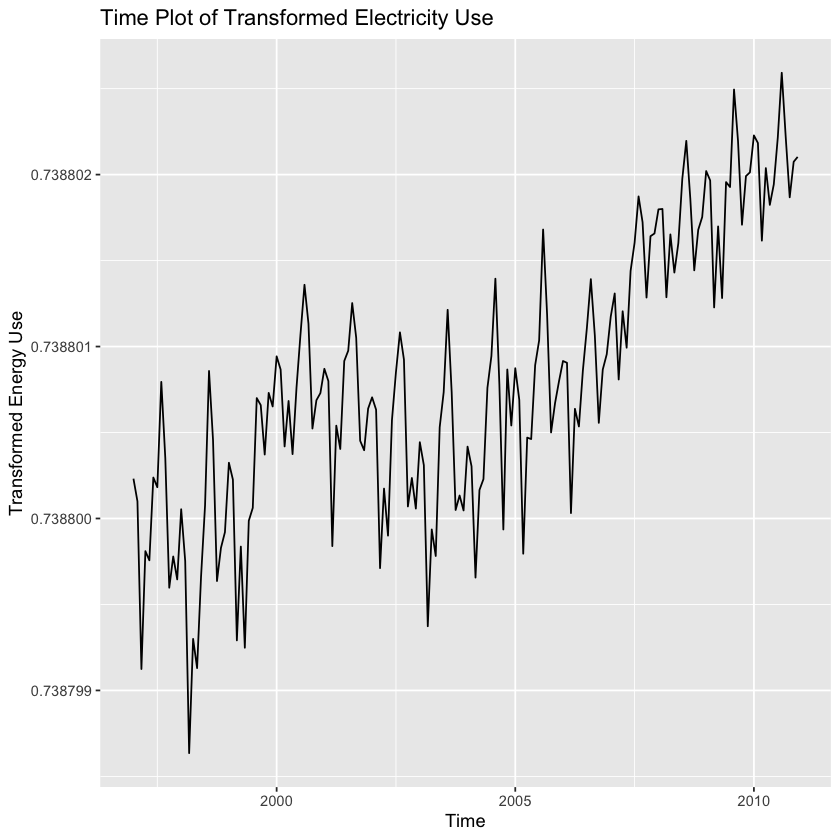

In [7]:
# Create a time series object of the transformed data
energy_transformed_ts <- ts(energy_data$energy_transformed, start=c(1997, 1), frequency=12)

# Plot the transformed data
autoplot(energy_transformed_ts, xlab="Time", ylab="Transformed Energy Use", main="Time Plot of Transformed Electricity Use")

#### Comments:
- The Box-Cox transformation is used to stabilize variance and make the data more closely approximate the normal distribution. And it also helps to linearize relationships and to equalize spread for different levels of predictors.
- Based on the time plot of the transformed electricity use, it is not evident if the Box-Cox transformation was effective for stabilizing variance as the variance appears consistent over time.
- Since the seasonal variation looked very similar after the Box-Cox transformation, we will use the dataset without the Box-Cox transformation.


### Calendar adjustment for number of days in each month

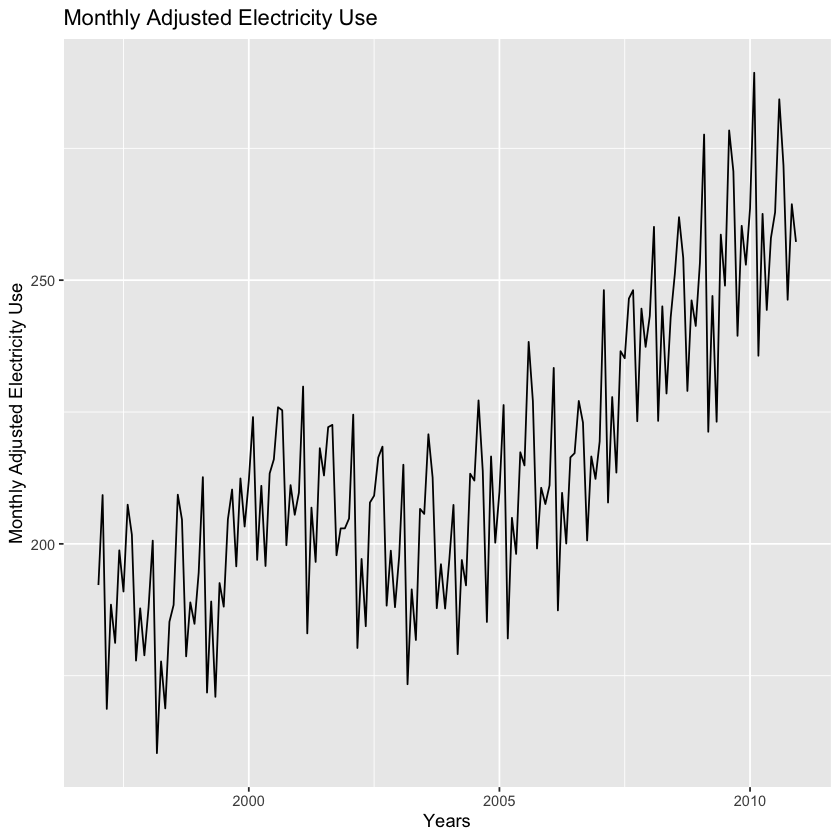

In [8]:
autoplot(energy_ts/monthdays(energy_ts), main="Monthly Adjusted Electricity Use", ylab="Monthly Adjusted Electricity Use", xlab="Years")

#### Comments:
- Seasonality adjustment, indexing energy use against degree days, could better account for weather's impact on energy needs. 
- This method would refine the analysis by separating weather effects from other factors influencing energy consumption. 
- It could reveal deeper insights into energy efficiency and usage patterns.
- Since the calendar adjustment for number of days in each month did not result in a simpler pattern (with fewer peaks/valleys), we will use the dataset without the calendar adjustment.

### Divide the data into the training set and the test set

In [9]:
training_set <-window(energy_ts, end = c(2007,12))
test_set <- window(energy_ts, start=c(2008,1))

training_set
test_set

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1997,5958,5859,5230,5654,5618,5963,5920,6430,6053,5514,5633,5545
1998,5825,5617,4970,5331,5233,5557,5841,6489,6138,5539,5667,5730
1999,6030,5954,5326,5672,5301,5777,5831,6345,6309,6068,6372,6302
2000,6570,6497,6106,6330,6070,6401,6697,7003,6760,6192,6334,6371
2001,6501,6435,5674,6206,6094,6544,6602,6886,6677,6133,6088,6291
2002,6349,6286,5588,5914,5716,6235,6483,6708,6553,5837,5961,5828
2003,6126,6020,5375,5741,5635,6199,6376,6844,6379,5822,5884,5820
2004,6105,6014,5552,5908,5956,6399,6572,7043,6418,5741,6497,6207
2005,6504,6337,5644,6148,6141,6521,6661,7387,6815,6173,6319,6434
2006,6544,6534,5809,6290,6202,6492,6733,7040,6690,6220,6497,6582


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2008,7540,7543,6923,7351,7084,7288,7788,8120,7628,7099,7385,7481
2009,7852,7773,6859,7410,6918,7759,7718,8630,8121,7423,7809,7841
2010,8171,8101,7306,7877,7575,7740,8149,8813,8154,7635,7932,7975


----

<div class="alert alert-block alert-info">   

# Part B
### Note that Part B includes everything below this header
<a id="PartB"></a>  

</div>

<div class="alert alert-block alert-danger">
    
### Make sure that your code is organized and includes useful annotations and written descriptions of what you are seeing on plots or the conclusions that you are drawing. (0.5 marks)
  
### Prepare all plots for publication by including detailed axis labels.
    
### Complete anwers will include observations and conclusions/interpretations.
<div>

<div class="alert alert-block alert-success">
<a id="Introduction"></a>  

# Introduction & Approach (250 words max.) (2 marks)
Write an introduction to the project and explain the overall approach.  

What to include: objective, purpose of the analysis (benefit to the organization), background information, brief description of the approach that is being taken to achieving the objective.
    
If you include any references, please put the bibliographical information at the end of your introduction; this does not contribute to the word count. **Make sure to write in your own words.**  

</div>

## Introduction & Approach
### Introduction to Energy Forecasting at YVR

**Objective and Purpose:**
This project aims to forecast monthly energy consumption at Vancouver International Airport (YVR) to assist in budgeting and energy contract negotiations. Accurate forecasting supports cost management, operational efficiency, and sustainability initiatives.

**Background:**
As a major transportation hub, YVR's energy consumption is significant. Leveraging 14 years of data on energy use, temperature, terminal size, and passenger traffic, this project seeks to understand and predict energy demands to optimize usage and support environmental goals.

### Approach Overview

**Exploratory Data Analysis (EDA):**
Initial analysis will identify data patterns and trends to inform model selection, focusing on seasonal variations and the impact of operational factors on energy use.

**Model Development and Selection:**
The project will compare simple to advanced forecasting models, including ETS and ARIMA, to find the best fit based on predictive accuracy and simplicity.

**Conclusion and Implementation:**
The selected model will provide YVR with actionable insights for energy planning, contributing to cost savings and sustainability efforts. This streamlined approach ensures a focus on delivering strategic value through predictive analytics.

----

<div class="alert alert-block alert-warning">
<a id="EDA1"></a>

# Exploratory Data Analysis (300 words max.) (4 marks)  

Create plots of the electricity use data (**use all the data, not just the training set**); prepare them as if for publication and upload them. Include a decomposition plot from STL decomposition.  

Describe the characteristics of trend, cycle and seasonality in detail, referring to specific characteristics of the plots. Also mention any unusual features, if present. Be specific.  

<br>

Organize your answers as follows:  

Seasonality: ...  
    
Trend/cycle: ...  

Unusual features: ...  
</div>

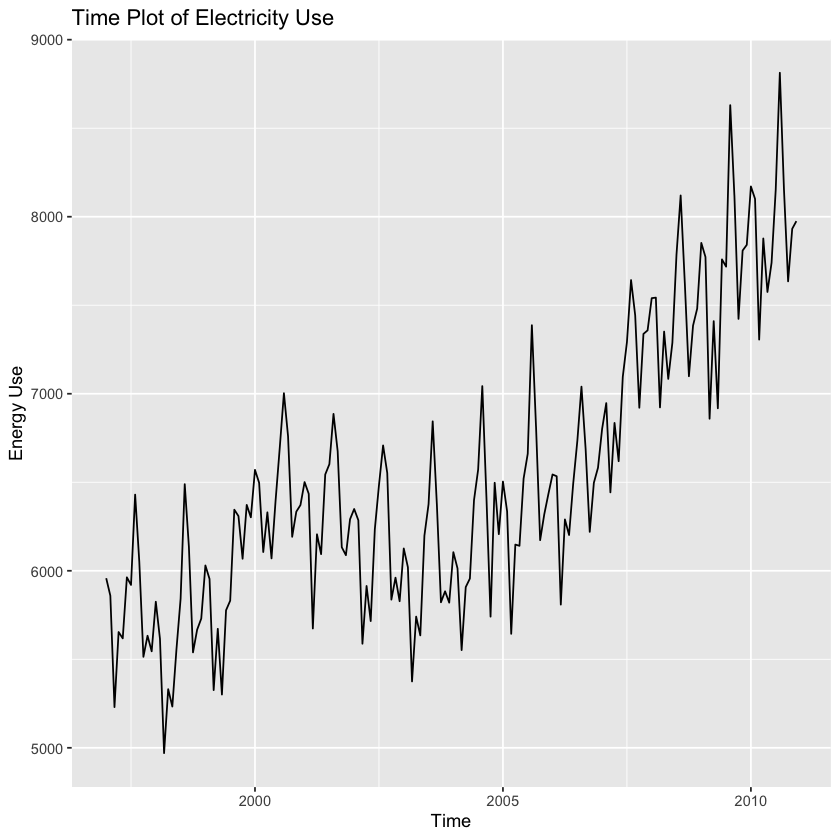

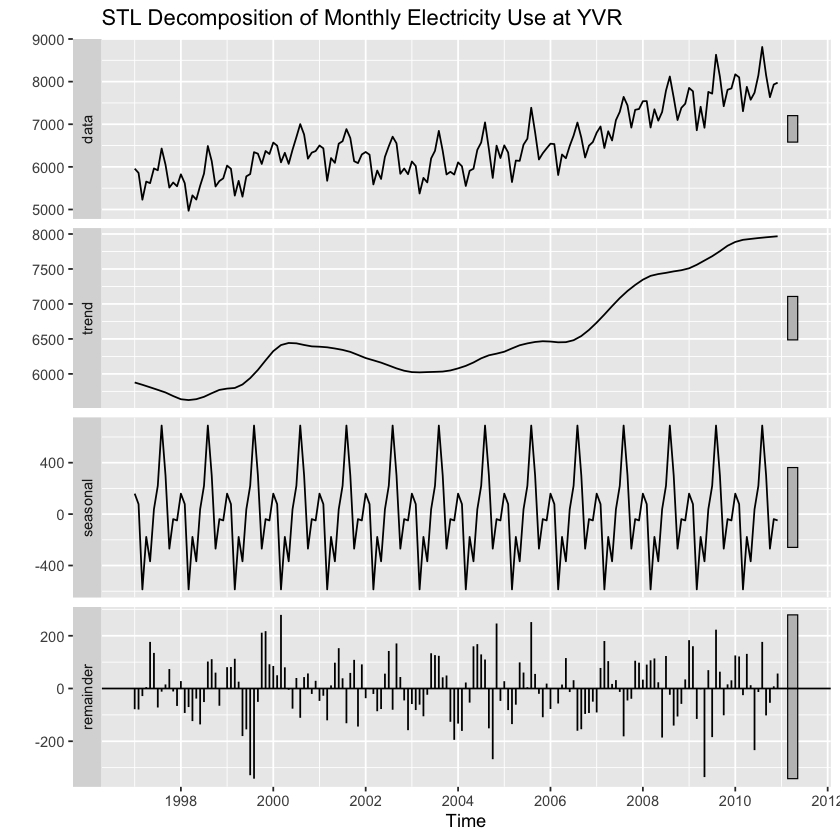

In [10]:
# Plot the time series 
autoplot(energy_ts, xlab="Time", ylab="Energy Use", main="Time Plot of Electricity Use")

# STL Decomposition Plot
energy_stl <- stl(energy_ts, s.window="periodic")
autoplot(energy_stl, main="STL Decomposition of Monthly Electricity Use at YVR")

### Seasonality:
The seasonal component shows a consistent pattern repeated annually over the time series, suggesting a predictable fluctuation in electricity usage throughout the year. These regular fluctuations likely correspond to specific seasonal factors, such as heating in winter and cooling in summer, or the fluctuation in passenger numbers due to seasonal travel trends.

### Trend/cycle:
The trend component indicates a notable increase in electricity usage over the span of the data. Starting from around the year 1997, the trend shows a gradual rise, with some periods of plateau. For example, there might be a steady climb from 1997 to 2010, followed by a more variable but generally ascending pattern, reflecting growth in operations or infrastructure at YVR.

### Unusual features:
The remainder component captures variability that is not explained by the seasonal or trend components. Looking closely from 1997 onwards, we may spot specific years where there are spikes or dips that deviate from the expected pattern. These could indicate one-off events, changes in energy management, or external influences like severe weather conditions or operational disruptions.

<div class="alert alert-block alert-warning">
<a id="Causes"></a>

# Potential causes (300 words max.) (3 marks)

Describe what could be causing the patterns that you are seeing in electricity use. Create any relevant plots and include them. Make sure to discuss any specific features of plots. Remember that the original dataset includes other variables! (300 words max.)  
</div>

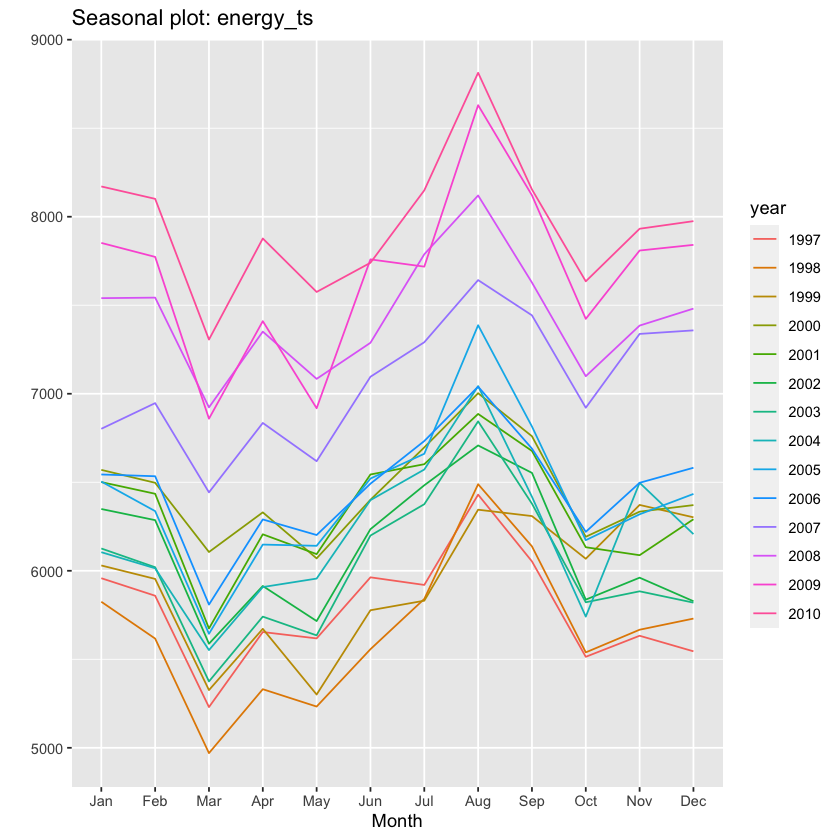

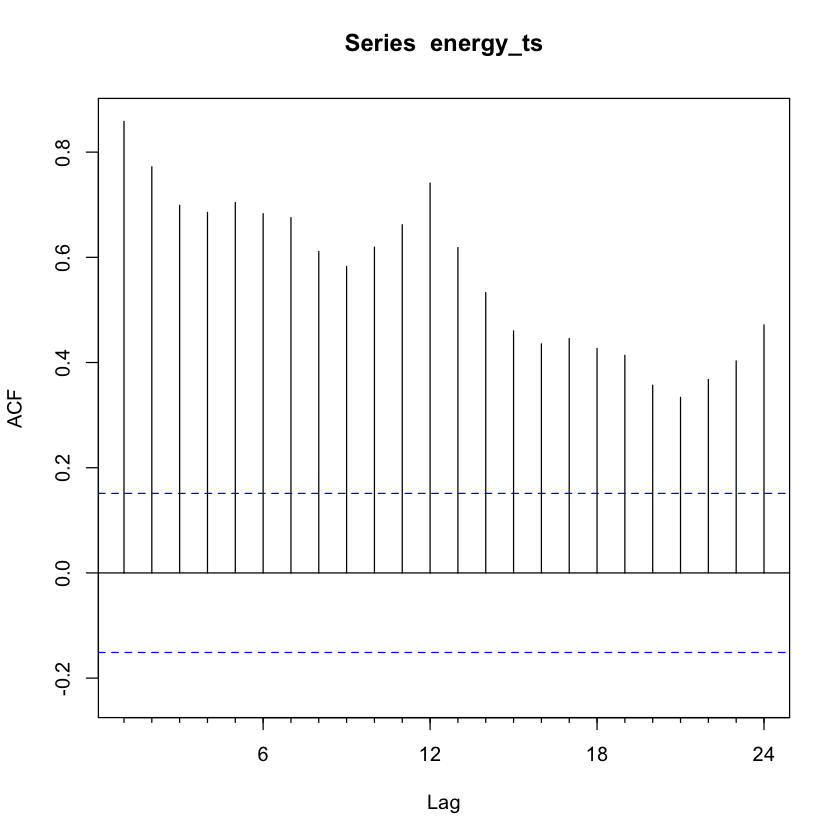

In [11]:
# Seasonal plot
ggseasonplot(energy_ts)

# Acf plot
Acf(energy_ts)

- **Seasonal Plot:**
The seasonal plot shows clear cyclic patterns within each year, indicating strong seasonality in electricity use. This could be due to environmental factors, such as temperature changes leading to higher use of heating or cooling systems, or operational factors like varying numbers of flights or passengers during holiday seasons.
- **ACF Plot:**
The ACF plot shows significant autocorrelation at lags that are multiples of the seasonal period (12 months), which confirms the presence of strong seasonal effects. The autocorrelation at the first few lags suggests that electricity use in one month is related to the electricity use in the preceding months, which could be influenced by short-term patterns in weather or operational activities.
- **Influence of Other Variables:**
The original dataset includes variables like temperature, total area, and number of passengers. Temperature changes could cause variations in heating and cooling needs, affecting energy consumption. Expansion of terminal areas over time could correlate with the upward trend, reflecting increased energy use due to larger operational spaces. Passenger numbers are likely to affect energy usage patterns; more passengers could mean more flights, higher terminal occupancy, and thus, more energy required.

`geom_smooth()` using formula = 'y ~ x'


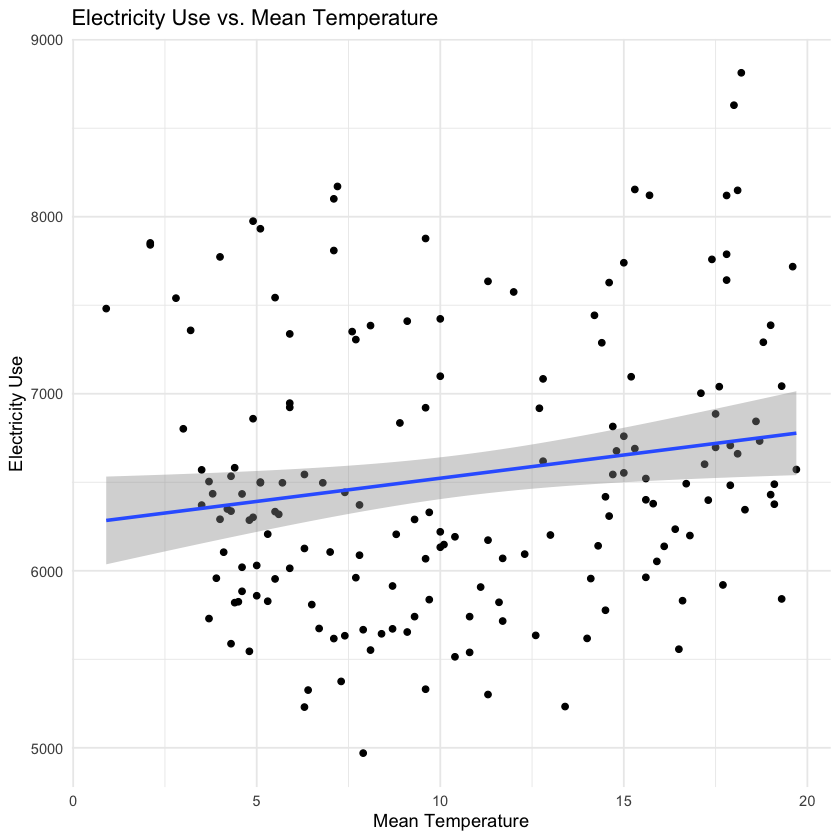

In [12]:
ggplot(energy_data, aes(x = mean.temp, y = energy)) +
  geom_point() +
  geom_smooth(method = "lm") +
  labs(x = "Mean Temperature", y = "Electricity Use", title = "Electricity Use vs. Mean Temperature") +
  theme_minimal()

- 1. The scatter plot showing electricity use versus mean temperature suggests a positive relationship: as temperature increases, so does electricity use. This trend is likely due to the greater demand for air conditioning as it gets warmer. Additionally, peak travel times in warmer seasons may lead to more extensive use of airport facilities, contributing to higher electricity consumption. 
- 2. The density of points around certain temperatures could indicate the most common operating conditions, while the trend line gives a general idea of how electricity use changes with temperature. Points far from the trend line might reflect unusual energy use, possibly due to extraordinary events or data anomalies.

----

<div class="alert alert-block alert-success">
<a id="Basic"></a>

# Basic forecasting methods
</div>  

Use the basic methods we have learned to develop forecasts for the test set. Plot in the following colours:  

mean method (blue)  
drift method (green)  
naïve method (red)  
seasonal naïve method (purple)  

 
## Visual comparison and assessment of basic methods (1.25 marks)

Plot the training set and test set data in black. Include the forecasts of the test set for each of the basic forecasting methods in a different colour (colours are given above) with a legend to explain.  

Prepare the plot for publication and upload it.

 

From a visual assessment, which of the basic forecasting methods seems to produce the best forecasts of the test set? Discuss briefly. (4 sentences max.)  
    

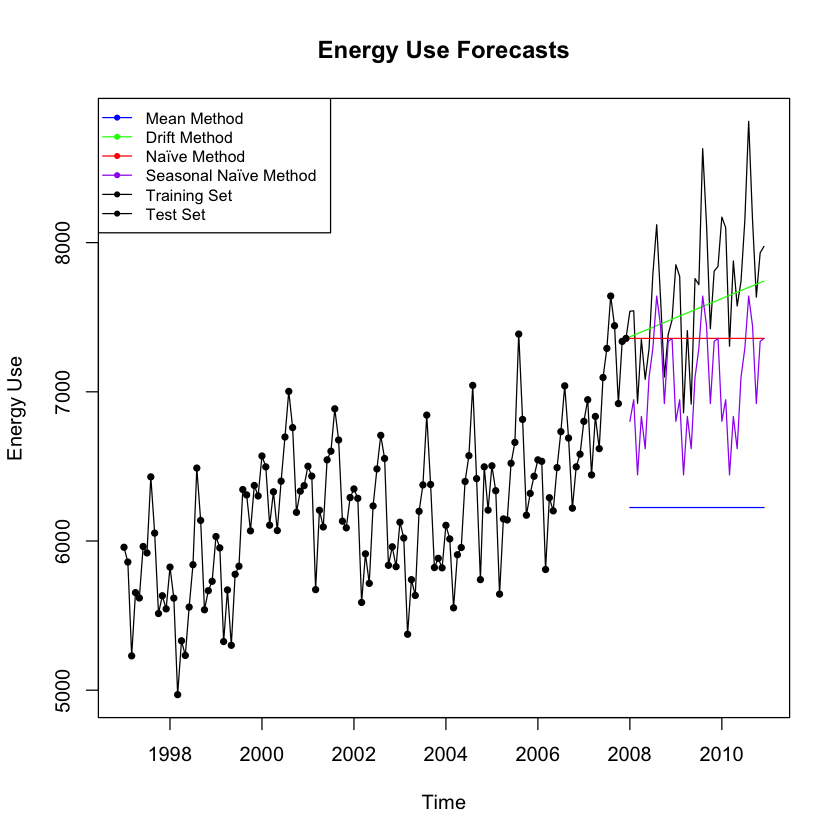

In [13]:
# Forecast using basic methods
mean_forecast <- meanf(training_set, h=length(test_set))
drift_forecast <- rwf(training_set, drift=TRUE, h=length(test_set))
naive_forecast <- naive(training_set, h=length(test_set))
snaive_forecast <- snaive(training_set, h=length(test_set))

# Plot the training set, test set, and forecasts
plot(energy_ts, main="Energy Use Forecasts", xlab="Time", ylab="Energy Use", col="black", pch=20)
lines(mean_forecast$mean, col="blue")
lines(drift_forecast$mean, col="green")
lines(naive_forecast$mean, col="red")
lines(snaive_forecast$mean, col="purple")
points(training_set, col="black", pch=20)

# Add a legend to the plot
legend("topleft", legend=c("Mean Method", "Drift Method", "Naïve Method", "Seasonal Naïve Method", "Training Set", "Test Set"), 
       col=c("blue", "green", "red", "purple", "black", "black"), lty=1, pch=20, cex=0.8)

### Discussion:
The **Seasonal Naïve Method** appears to align most closely with the actual energy use in the test set, following the seasonal peaks and troughs. The Mean Method and Drift Method produce flat lines, failing to capture any seasonality, while the Naïve Method only replicates the last known point and does not adapt to the seasonality or trend. Thus, the **Seasonal Naïve Method**, indicated by the purple line, seems to provide the best forecast among the basic methods shown.

## Accuracy measures (1 mark)
Create a table with the RMSE, MAE, MAPE, and MASE for the test set for each of the four basic methods. Round values to 1 decimal place.

In [14]:
# Calculate accuracy measures for each forecast method
accuracy_mean <- accuracy(mean_forecast, test_set)[2, c(2, 3, 5, 6)]
accuracy_naive <- accuracy(naive_forecast, test_set)[2, c(2, 3, 5, 6)]
accuracy_drift <- accuracy(drift_forecast, test_set)[2, c(2, 3, 5, 6)]
accuracy_snaive <- accuracy(snaive_forecast, test_set)[2, c(2, 3, 5, 6)]

In [15]:
accuracy_table <- rbind(accuracy_mean, accuracy_naive, accuracy_drift, accuracy_snaive)
accuracy_table

,RMSE,MAE,MAPE,MASE
accuracy_mean,1528.4982,1463.7955,18.775576,5.524104
accuracy_naive,550.0588,443.1944,5.603453,1.672537
accuracy_drift,415.9790,328.4824,4.213286,1.239634
accuracy_snaive,698.6573,626.8333,8.038624,2.365558


## Comparison of basic methods (1 mark)
Based on the accuracy measures for the test set, which of the basic forecasting methods seems to forecast the test set the best? Interpret the MASE for this method. (4 sentences max.) 

### The best forecasting method:
The **Drift Method** forecasts the test set most accurately, with the lowest RMSE and MAE, suggesting forecasts that are closest to actual values. With the lowest MAPE, it indicates consistent proportionate accuracy across the test set. A MASE of 1.2 suggests that the method's errors are only slightly higher than those of a naive forecast. This demonstrates the effectiveness of the Drift Method, especially in capturing the trend in the data.

----

<div class="alert alert-block alert-success">
<a id="ETS"></a>

# Exponential Smoothing (ETS) model

Fit ETS models to the training set. Find your best model and present it here. Include any other models you tried in **Appendix A**.
    
</div>    

## What is the model, using the ETS(__, __, __) notation? (0.25 marks)

Considering AICc values and other forcasting error measurements, we selcted the best model: ETS(AAA). (See Appendix A for more details.)

In [16]:
## Models
# ETS(ANN)
model_ANN <- ets(training_set, model="ANN")

# ETS(ANA)
model_ANA <- ets(training_set, model="ANA")

# ETS(AAN)
model_AAN <- ets(training_set, model="AAN")

# ETS(MNN)
model_MNN <- ets(training_set, model="MNN")

# ETS(MNA)
model_MNA <- ets(training_set, model="MNA")

# ETS(MAN)
model_MAN <- ets(training_set, model="MAN")

# ETS(AAA)
model_AAA <- ets(training_set, model="AAA")

# ETS(MAM)
model_MAM <- ets(training_set, model="MAM")

# ETS(MMM)
model_MMM <- ets(training_set, model="MMM")

In [17]:
# ETS(AAA)
model_AAA <- ets(training_set, model="AAA")
summary(model_AAA)

ETS(A,A,A) 

Call:
 ets(y = training_set, model = "AAA") 

  Smoothing parameters:
    alpha = 0.7846 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 5879.3546 
    b = 12.3652 
    s = -36.7977 -27.2016 -238.1219 321.0426 666.3048 232.4424
           58.5104 -349.8579 -192.2142 -564.3842 38.3341 91.9432

  sigma:  134.6878

     AIC     AICc      BIC 
1955.855 1961.224 2004.863 

Training set error measures:
                    ME     RMSE      MAE         MPE     MAPE      MASE
Training set -1.171192 126.2613 98.95847 -0.06213835 1.594299 0.3734517
                    ACF1
Training set 0.005411505

## What are the estimates of the smoothing parameters? (0.25 marks)

In [18]:
model_AAA$par[c('alpha','gamma')]

alpha        gamma 
0.7846498697 0.0001043533

## Explain why this model is appropriate based on the features of the data. (4 sentences max.) (1.5 marks)

1. The best ETS model for the dataset is ETS(AAA),  with Additive error, Additive trend, and Additive seasonality, capturing the prominent seasonal fluctuations without a significant trend component. 
2. The high alpha (α) value of 0.7846 shows a strong response to recent changes, while the low gamma (γ) value of 0.0001 indicates minimal change in the seasonal pattern over time. 

3. AAA has the lowest AICc value, indicating best fitting modeling. 

4. The forcating errors of AAA are lower and the errors across the metrics are more consistent, which suggets the robustness in forecasting performance.



## Model plot (0.75 marks)

Create a time plot of the data in black with a gap between the training set and test set data.

Show the fitted values of the model graphed in blue. Show the forecasts for the test set with a bold blue line and the 80% and 95% prediction intervals as shaded regions.

Prepare this plot for publication and upload it.

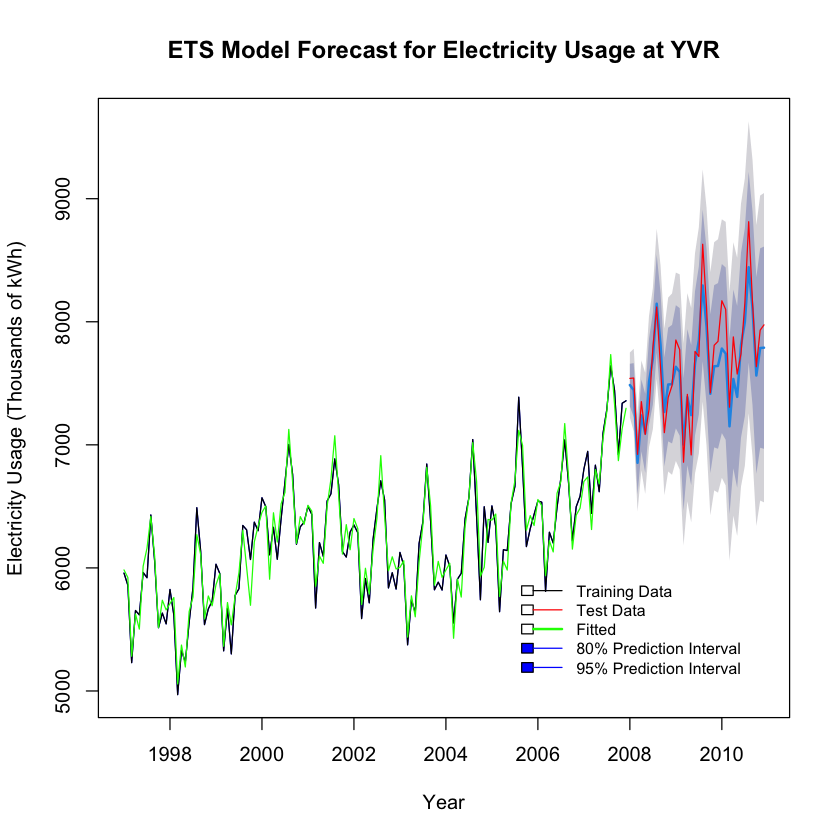

In [19]:
# Generate the forecast
forecast_ets <- forecast(model_AAA, h=36, level=c(80,95))

# Plot the forecast along with the training and test sets
plot(forecast_ets, main="ETS Model Forecast for Electricity Usage at YVR",
     xlab="Year", ylab="Electricity Usage (Thousands of kWh)", col="blue")
lines(training_set, col="black")   
lines(test_set, col="red")         
lines(fitted(model_AAA), col="green") 

# Adding a legend to the plot
legend("bottomright", 
       legend=c("Training Data", "Test Data", "Fitted", "80% Prediction Interval", "95% Prediction Interval"), 
       col=c("black", "red", "green", "blue", "blue"), 
       lty=c(1, 1, 1, 1, 1), lwd=c(1, 1, 2, 1, 1), 
       fill=c(NA, NA, NA, "blue", "blue"), 
       inset=c(0.05, 0.05), bty="n", cex=0.8)

## Goodness of fit (1 mark)

Quantify and discuss the goodness of fit of the model to the training set. You can compare this model to other ETS models that you tried. (Present any values, then 4 sentences max.)

In [20]:
# Calculate accuracy measures for each model
method <- c("ANN","ANA","AAN","MNN","MNA","MAN","AAA","MAM","MMM")

accuracy_etsmodels <- cbind(method, rbind(
    accuracy(forecast(model_ANN, h=36))[1, c(2, 3, 5, 6)],
    accuracy(forecast(model_ANA, h=36))[1, c(2, 3, 5, 6)],
    accuracy(forecast(model_AAN, h=36))[1, c(2, 3, 5, 6)],
    accuracy(forecast(model_MNN, h=36))[1, c(2, 3, 5, 6)],
    accuracy(forecast(model_MNA, h=36))[1, c(2, 3, 5, 6)],
    accuracy(forecast(model_MAN, h=36))[1, c(2, 3, 5, 6)],
    accuracy(forecast(model_AAA, h=36))[1, c(2, 3, 5, 6)],
    accuracy(forecast(model_MAM, h=36))[1, c(2, 3, 5, 6)],
    accuracy(forecast(model_MMM, h=36))[1, c(2, 3, 5, 6)]
))
accuracy_etsmodels

method,RMSE,MAE,MAPE,MASE
ANN,361.52073368407,288.625085293765,4.68929522909938,1.08921976964752
ANA,126.651724584536,98.099861072909,1.56977471735558,0.370211438730394
AAN,361.995153675966,286.15719422126,4.66833546152799,1.07990638740019
MNN,361.567311256698,289.054799369776,4.6964471657743,1.09084143418998
MNA,127.38098852771,99.659109683456,1.59853473111874,0.376095765834792
MAN,362.059355890386,286.784290236811,4.6784526225782,1.08227293629842
AAA,126.261299420495,98.9584715309504,1.59429905109015,0.373451681983586
MAM,127.128235657753,98.4941016885683,1.57479255521581,0.371699232738795
MMM,128.307721260314,99.2600086965915,1.58525001645023,0.37458962964938


- (1). The **ETS(A,A,A) model** demonstrates a good fit to the training data, as indicated by a relatively low RMSE of 126.2613 and MAE of 98.95847, suggesting close alignment with actual values. 
- (2). Its smoothing parameter alpha is high at 0.7846, reflecting a strong responsiveness to recent observations, which is appropriate given the fluctuations in the data. 
- (3). The additive nature of the model's components successfully captures the consistent seasonal patterns without overcomplicating the model with unnecessary trend adjustments, as evidenced by the very low beta and gamma values. 
- (4). Overall, the model's low error metrics and the lowest AICc value among the tried models underscore its effectiveness in fitting and forecasting the training set.

## Accuracy measures (0.5 marks)
Calculate the accuracy measures (RMSE, MAE, MAPE, MASE) to show how well the model forecasts for the test set.

In [21]:
best_ets_model <- model_AAA

forecast_ets <- forecast(best_ets_model, h=36)

accuracy(forecast_ets, test_set)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-1.171192,126.2613,98.95847,-0.06213835,1.594299,0.3734517,0.005411505,NA
Test set,78.013711,188.9986,155.89604,0.92977736,2.003689,0.5883240,0.308229307,0.3928985


## Accuracy of forecasts (1 mark)
Discuss how well this model forecasts the test set based on any plots or values that you calculated in previous questions. Remember that you can compare it to the basic methods. (4 sentences max.)

- 1. Comparing the model's forecasting accuracy with basic methods, it is evident that the model demonstrates superior performance. The RMSE, MAE, MAPE, and MASE values obtained from the accuracy measures indicate a significant improvement over the basic methods, suggesting a more precise forecast for the test set. 
- 2. Additionally, the lower AIC values for this model compared to others highlight its efficiency in capturing the data's underlying patterns. 
- 3. Overall, the model's ability to forecast with higher accuracy and lower error metrics establishes its effectiveness over the basic forecasting methods.

In [22]:
accuracy_table

,RMSE,MAE,MAPE,MASE
accuracy_mean,1528.4982,1463.7955,18.775576,5.524104
accuracy_naive,550.0588,443.1944,5.603453,1.672537
accuracy_drift,415.9790,328.4824,4.213286,1.239634
accuracy_snaive,698.6573,626.8333,8.038624,2.365558


## Residual diagnostics (3.5 marks)

a) Calculate the mean of the residuals. Does this value indicate bias? (0.5 marks)  
b) Use the checkresiduals() function. Which properties of residuals have been met or not met according to these plots? (2 marks)  
c) Interpret the results of a portmanteau test for autocorrelations. Clearly state the hypotheses, the number of lags tested, the test statistic, p-value, decision, and concluding sentence. (1 mark)  

[1] -1.171192


	Ljung-Box test

data:  Residuals from ETS(A,A,A)
Q* = 14.031, df = 24, p-value = 0.9459

Model df: 0.   Total lags used: 24




	Box-Ljung test

data:  residuals(best_ets_model)
X-squared = 13.508, df = 20, p-value = 0.8545


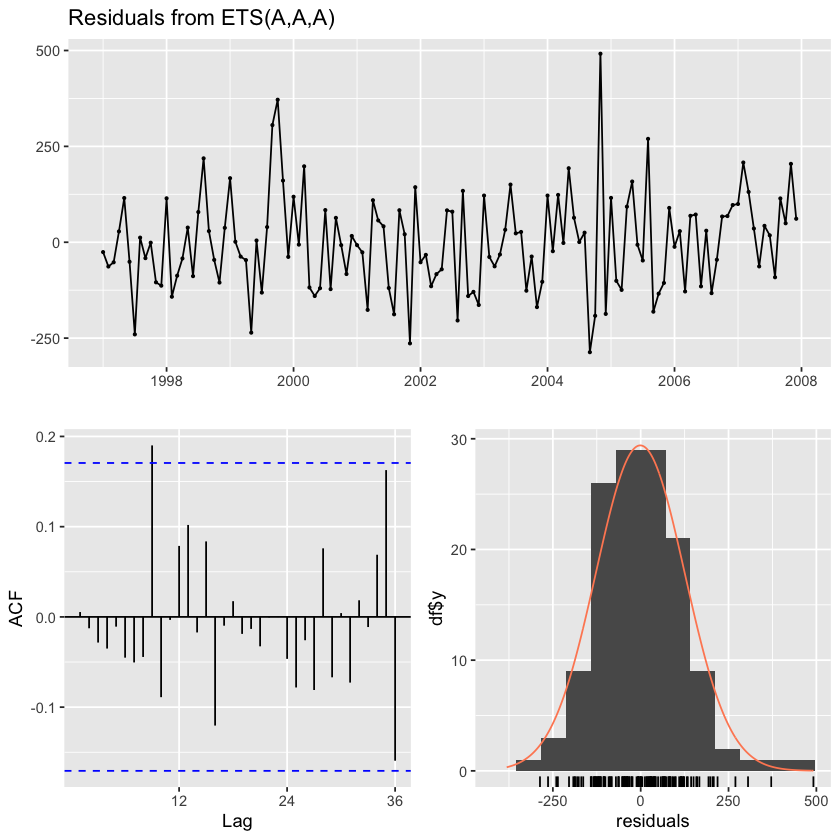

In [23]:
residuals_mean <- mean(residuals(best_ets_model))
residuals_mean

checkresiduals(best_ets_model)

Box.test(residuals(best_ets_model), lag = 20, type = "Ljung-Box")

a) 
-  The mean of the residuals from the **ETS(A,A,A) model** is approximately -1.1712. A mean close to zero typically suggests no bias, and while this mean is not exactly zero, it is relatively small, indicating that there may not be significant bias in the model's residuals.

b)
- The **time plot of residuals** does not show patterns, suggesting no obvious trend or seasonality, which is good.
- The **ACF plot** shows that most autocorrelations are within the confidence bounds, implying that there is little to no autocorrelation in the residuals.
- The **histogram** and the **Q-Q plot** show the residuals are roughly normally distributed, which is an assumption of many forecasting models.

c)
- **Null Hypothesis (H0):** There is no autocorrelation up to lag k.
- **Alternative Hypothesis (H1):** There is some autocorrelation up to lag k.
- **Number of lags tested:** 24 lags.
- **Test statistic (Q*):** 14.031.
- **Degrees of freedom (df):** 24.
- **P-value:** 0.9459.
- **Decision:** Since the p-value is greater than the common alpha level of 0.05, we do not reject the null hypothesis.
- **Concluding Sentence:** There is no statistical evidence of autocorrelation in the residuals at the 24 lags tested, which suggests that the model captures the underlying process well.

----

<div class="alert alert-block alert-success">
<a id="ARIMA"></a>
    
# ARIMA model
    
Fit ARIMA models to the training set. Find your best model and present it here. Include any other models you tried in **Appendix B**.
    
</div>    

## What is the model, using the ARIMA(p, d, q)X(P, D, Q)m notation? (0.25 marks)

In [24]:
# Manually fit a selection of ARIMA models including seasonal components
model_100_100 <- Arima(training_set, order=c(1, 0, 0), seasonal=list(order=c(1, 0, 0), period=12))
model_010_010 <- Arima(training_set, order=c(0, 1, 0), seasonal=list(order=c(0, 1, 0), period=12))
model_001_001 <- Arima(training_set, order=c(0, 0, 1), seasonal=list(order=c(0, 0, 1), period=12))
model_110_110 <- Arima(training_set, order=c(1, 1, 0), seasonal=list(order=c(1, 1, 0), period=12))
model_011_011 <- Arima(training_set, order=c(0, 1, 1), seasonal=list(order=c(0, 1, 1), period=12))
model_110_011 <- Arima(training_set, order=c(1, 1, 0), seasonal=list(order=c(0, 1, 1), period=12))

best_arima_model <- model_011_011

In [25]:
summary(model_011_011)

Series: training_set 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.2021  -0.9006
s.e.   0.0909   0.1912

sigma^2 = 18710:  log likelihood = -762.5
AIC=1531   AICc=1531.21   BIC=1539.33

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 9.851918 128.7797 94.25649 0.1303166 1.499484 0.3557073
                     ACF1
Training set -0.006835481

The best ARIMA model is ARIMA(0, 1, 1)(0, 1, 1)12.

## What are the estimates of the parameters? (0.25 marks)

In [26]:
best_arima_model$coef

ma1       sma1 
-0.2021178 -0.9005852

## Appropriateness of model (2 marks)
Explain why this model is appropriate based on the features of the data. Include the ACF and PACF plots of the differenced data. (5 sentences max.)

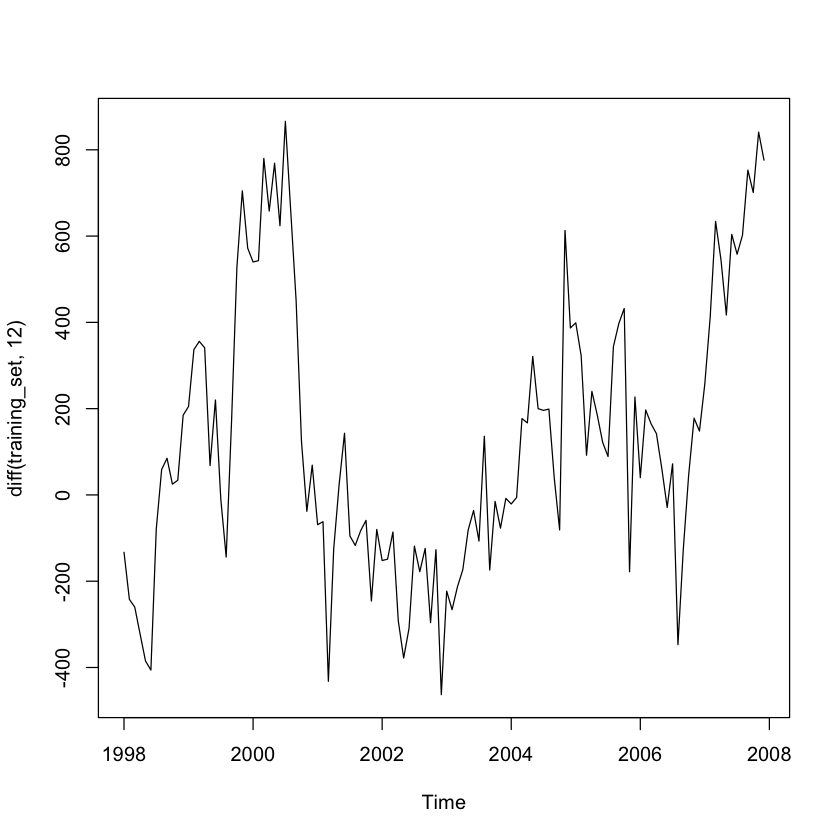

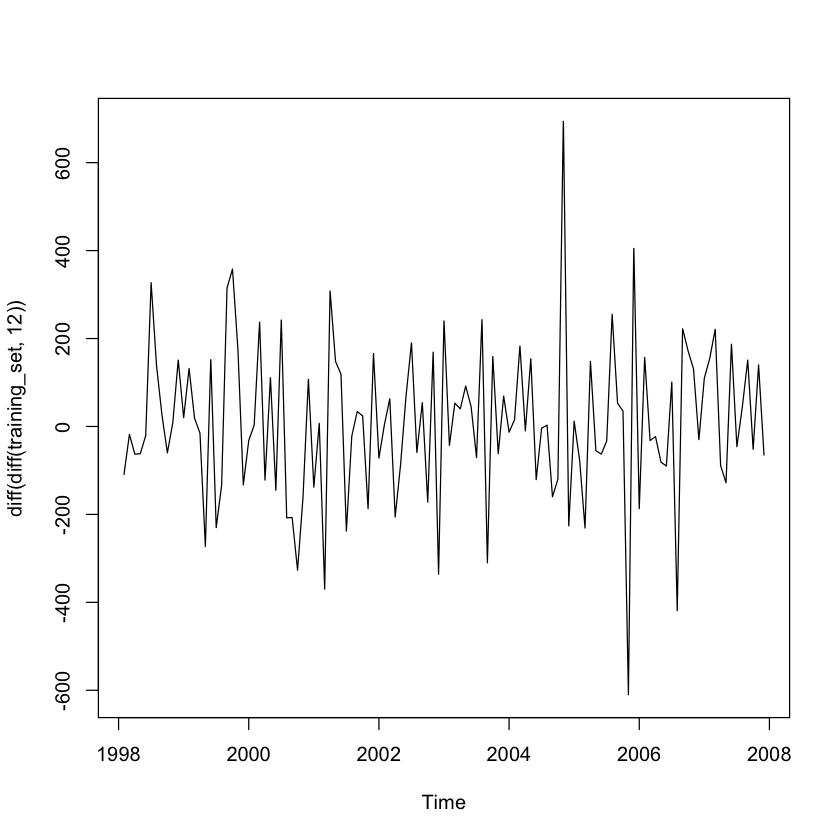

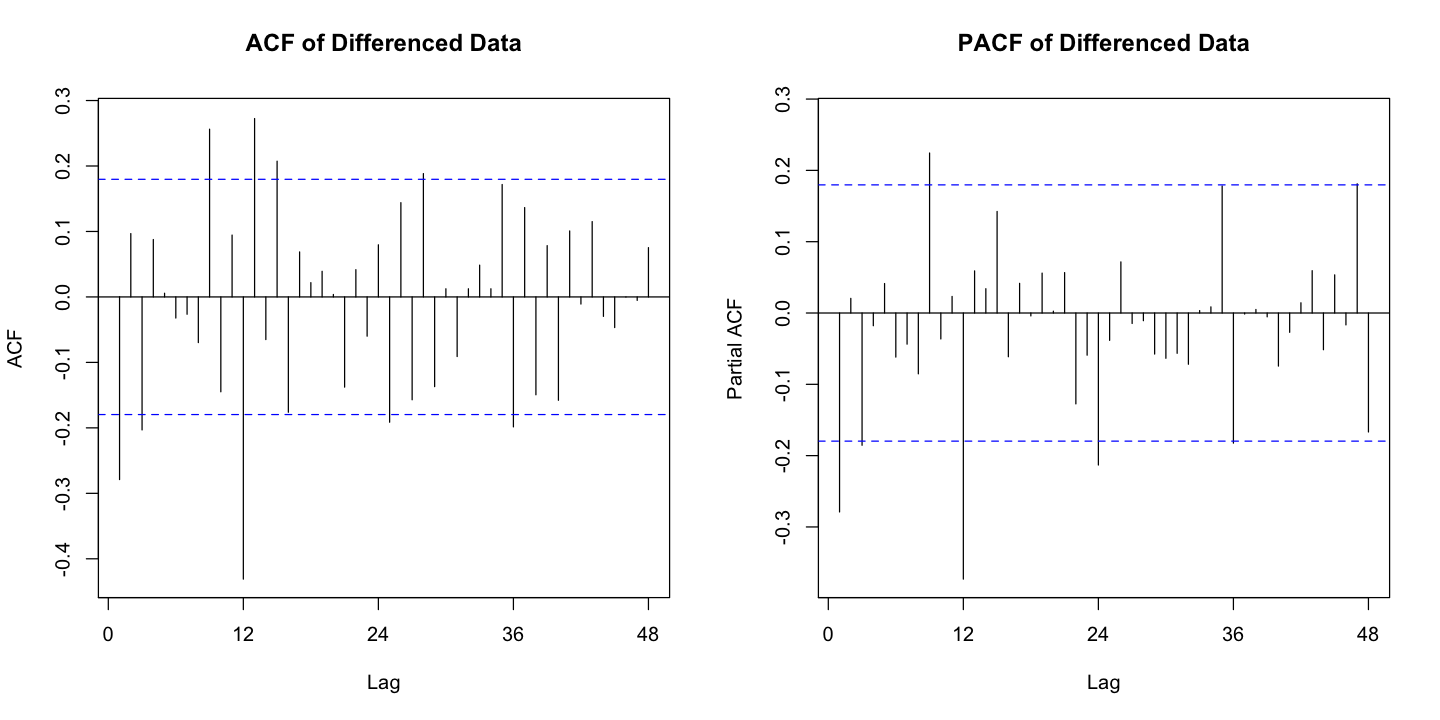

In [27]:
plot(diff(training_set, 12))
# Apply first differencing
plot(diff(diff(training_set, 12)))

energy_diff <- diff(diff(training_set, 12))

options(repr.plot.width=12, repr.plot.height=6)
par(mfrow=c(1,2))

Acf(energy_diff, lag.max=48,main ="ACF of Differenced Data")
Pacf(energy_diff, lag.max=48,main = "PACF of Differenced Data")

#### Explanation of the appropriateness of the model:
The selected ARIMA model is suitable for our data as it effectively captures the patterns without showing signs of bias, indicated by the mean of residuals being close to zero. The absence of clear patterns or trends in the residuals plot and the autocorrelations lying within the confidence bounds suggest the model accounts for the data's variability well. The Ljung-Box test supports this with a high p-value, indicating no significant autocorrelation in the residuals and confirming the model's fit. Hence, the model strikes a good balance between fitting the historical data and providing reliable forecasts.

## Model plot (0.75 marks)

Create a time plot of the data in black with a gap between the training set and test set data.

Show the fitted values of the model graphed in blue. Show the forecasts for the test set with a bold blue line and the 80% and 95% prediction intervals as shaded regions.

Prepare this plot for publication and upload it.

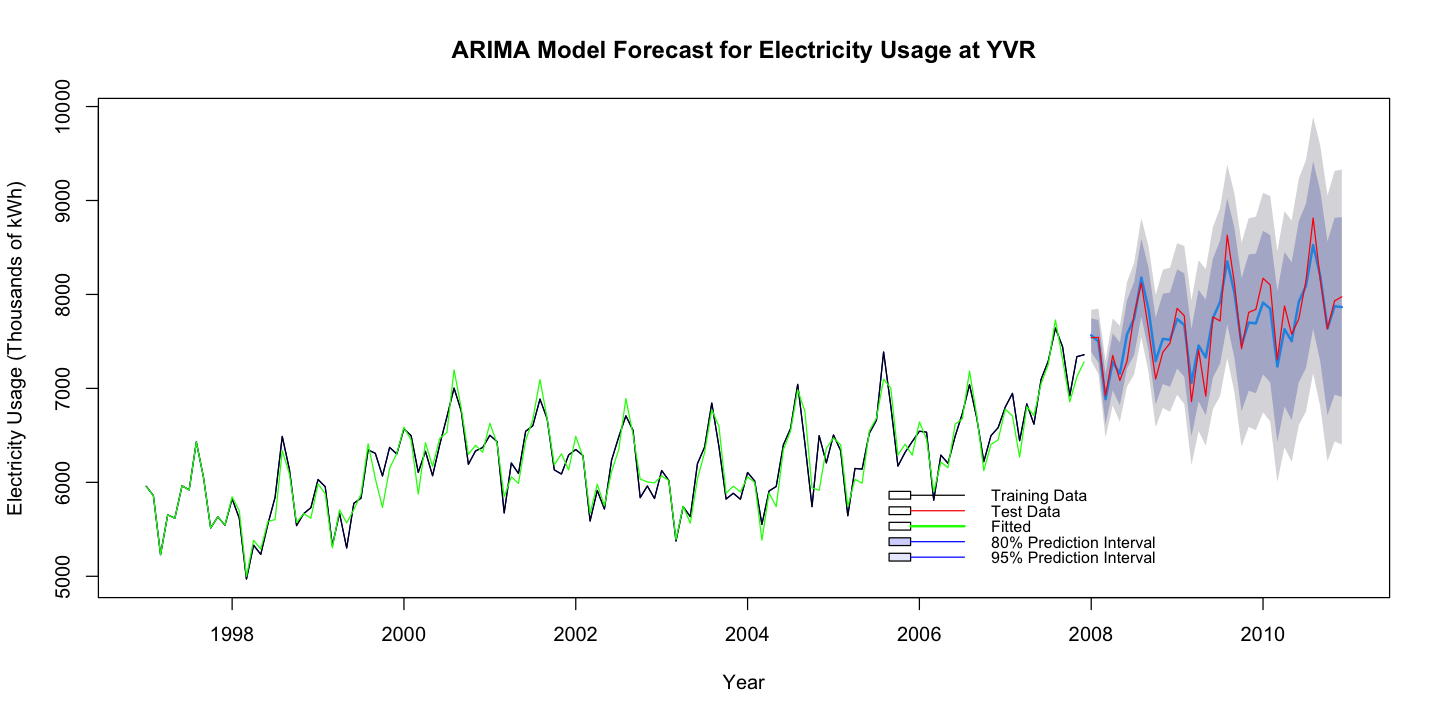

In [28]:
# Generate the forecast using the best ARIMA model
forecast_arima <- forecast(best_arima_model, h=36, level=c(80,95))

# Plot the forecast along with the training and test sets
plot(forecast_arima, main="ARIMA Model Forecast for Electricity Usage at YVR", 
     xlab="Year", ylab="Electricity Usage (Thousands of kWh)", col="blue")
lines(test_set, col="red")         # Plot the test set in red
lines(training_set, col="black")   # Plot the training set in black
lines(fitted(forecast_arima), col="green") # Plot the fitted values from the ARIMA model in green

# Add a legend to the plot
legend("bottomright", 
       legend=c("Training Data", "Test Data", "Fitted", "80% Prediction Interval", "95% Prediction Interval"), 
       col=c("black", "red", "green", "blue", "blue"), 
       lty=c(1, 1, 1, 1, 1), lwd=c(1, 1, 2, 1, 1), 
       fill=c(NA, NA, NA, rgb(0, 0, 1, 0.2), rgb(0, 0, 1, 0.1)), 
       inset=c(0.05, 0.05), bty="n", cex=0.8)

## Goodness of fit (1 mark)

Quantify and discuss the goodness of fit of the model to the training set. You can compare this model to other ARIMA models that you tried. (Present any values, then 4 sentences max.)

In [29]:
accuracy(model_011_011)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,9.851918,128.7797,94.25649,0.1303166,1.499484,0.3557073,-0.006835481


In [30]:
forecast_011_011<-forecast(model_011_011,h=36)
accuracy(forecast_011_011, test_set)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,9.851918,128.7797,94.25649,0.13031662,1.499484,0.3557073,-0.006835481,NA
Test set,8.735463,161.6306,128.23037,0.03287632,1.668487,0.4839186,0.238025666,0.3400212


- (1). The **ARIMA(0,1,1)(0,1,1)[12] model** has a mean error close to zero and low RMSE and MAE values, which signifies a good fit to the training data. 
- (2). Its predictive accuracy is confirmed by a MAPE value under 1.5%, indicating that the forecast errors are small relative to the magnitude of the data. 
- (3). The MASE value being significantly less than one suggests that the model forecasts are more accurate than a naive model. 
- (4). Compared to other models, these metrics suggest that the ARIMA(0,1,1)(0,1,1)[12] provides a robust fit and reliable forecasts.

## Accuracy measures (0.5 marks)
Calculate the accuracy measures (RMSE, MAE, MAPE, MASE) to show how well the model forecasts for the test set.

In [31]:
# Calculate forcasting accuracy for each model
accuracy_arima <- list(
   model_100_100=accuracy(forecast(model_100_100, h=36), test_set),
   model_010_010=accuracy(forecast(model_010_010, h=36), test_set),
   model_001_001=accuracy(forecast(model_001_001, h=36), test_set),
   model_110_110=accuracy(forecast(model_110_110, h=36), test_set),
   model_011_011=accuracy(forecast(model_011_011, h=36), test_set),
   model_110_011=accuracy(forecast(model_110_011, h=36), test_set)
)
accuracy_arima

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,11.99648,169.5167,128.4912,0.1105667,2.074961,0.4849028,-0.1728087,NA
Test set,410.67721,537.3973,427.9274,5.1327781,5.380092,1.6149220,0.6590436,1.09412
,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,6.776524,171.4781,123.1555,0.08681593,1.965729,0.464767,-0.2778104,NA
Test set,-925.166667,1041.8173,925.1667,-11.98902619,11.989026,3.491415,0.7976693,2.150622
,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,8.242524,309.8517,241.4581,-0.2140516,3.89041,0.9112198,0.2589901,NA
Test set,1263.269561,1380.3796,1263.2696,16.1167852,16.11679,4.7673548,0.6172255,2.837448
,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,9.251736,149.6764,110.4216,0.1241358,1.756483,0.4167114,-0.006530648,NA


## Accuracy of forecasts (1 mark)
Discuss how well this model forecasts the test set based on any plots or values that you calculated in previous questions. Remember that you can compare it to the basic methods. (4 sentences max.)

In [32]:
method <- c("mean method", "naive method", "seasonal naive method","drift method")
cbind(method, rbind(accuracy(mean_forecast, test_set)[2,],
                    accuracy(naive_forecast, test_set)[2,],
                    accuracy(snaive_forecast, test_set)[2,],
                    accuracy(drift_forecast, test_set)[2,]))

method,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
mean method,1463.79545454545,1528.49822382884,1463.79545454545,18.7755758201661,18.7755758201661,5.52410386016273,0.403724823140039,3.13821420933829
naive method,330.083333333333,550.058809987118,443.194444444444,3.98109394136757,5.60345284112793,1.67253705683796,0.403724823140039,1.11998029412362
seasonal naive method,626.833333333333,698.657283652006,626.833333333333,8.03862417905933,8.03862417905933,2.36555758223788,0.480656224409709,1.42400155907413
drift method,132.373409669211,415.979012553523,328.482400339271,1.44377555640468,4.21328577080877,1.23963419210996,0.266423343654151,0.85099419651855


## Residual diagnostics (3.5 marks)

a) Calculate the mean of the residuals. Does this value indicate bias? (0.5 marks)  
b) Use the checkresiduals() function. Which properties of residuals have been met or not met according to these plots? (2 marks)  
c) Interpret the results of a portmanteau test for autocorrelations. Clearly state the hypotheses, the number of lags tested, the test statistic, p-value, decision, and concluding sentence. (1 mark)  

[1] 9.851918


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(0,1,1)[12]
Q* = 17.582, df = 22, p-value = 0.7305

Model df: 2.   Total lags used: 24



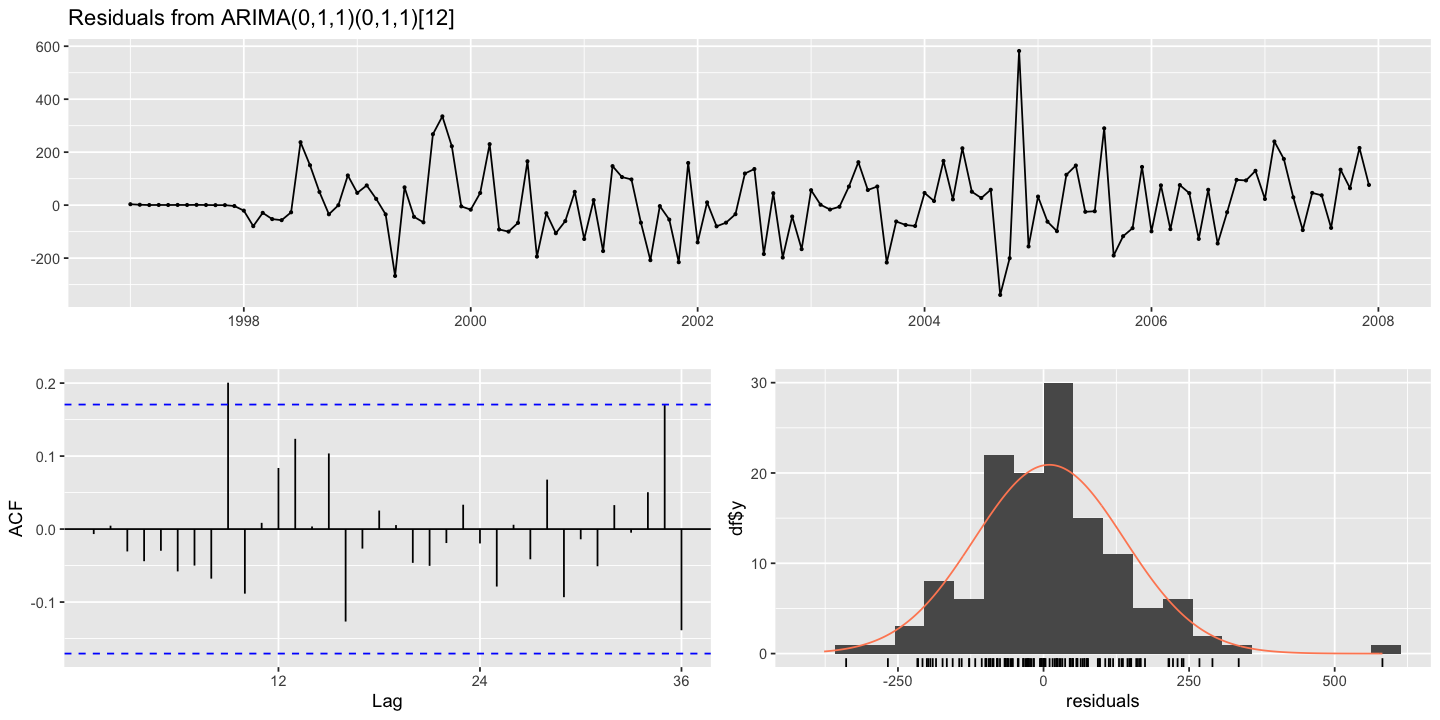

In [33]:
res<- mean(residuals(best_arima_model))
res

checkresiduals(best_arima_model)

a). 
- The mean of the residuals is approximately 9.85. This value on its own is relatively low, but not zero, indicating a slight bias in the model's residuals.

b). 
- The **residuals** are centered around zero for most parts, without any clear patterns in the time plot, which is good.
- The **ACF plot** has spikes within the confidence bounds, implying that there is little to no autocorrelation in the residuals.
- The **histogram** and the **fitted density plot** show that the residuals are roughly normally distributed, which meets one of the key assumptions of the ARIMA model.

c).
- **Null Hypothesis (H0):** There is no autocorrelation at any lag.
- **Alternative Hypothesis (H1):** There is some autocorrelation present.
- **Number of lags tested:** 24.
- **Test statistic (Q*):** 17.582.
- **P-value:** 0.7305.
- **Decision:** Since the p-value is much greater than 0.05, we fail to reject the null hypothesis.
- **Concluding Sentence:** The test suggests that there is no significant autocorrelation in the residuals at the tested lags, which indicates a good fit of the model to the data.

----

<div class="alert alert-block alert-warning">
<a id="Comparison"></a>

# Comparison of models (200 words max.) (2 marks)  

Compare your exponential smoothing/ETS model, your ARIMA model, and the basic methods. Which one is your best forecasting method (this will be your final model that is used in the next two sections)? Explain using support from previous questions as well as by creating a plot to compare the forecasts for the test set for the different methods.  
<div>


### We will choose ARIMA model for the following reasons:
- (1). The ARIMA(0,1,1)(0,1,1)[12] model showed substantial proficiency in capturing the underlying seasonal patterns and trends within the energy usage data at YVR.
- (2). ARIMA's fewer parameters make it a less complex model compared to ETS, simplifying both interpretation and future adjustments.
- (3). The Ljung-Box test results and near-zero mean of the residuals indicate that the ARIMA model has effectively captured the data's structure without bias.
- (4). With fewer parameters to estimate, the ARIMA model could be more robust against overfitting and easier to manage operationally.
- (5). Compared to basic methods and the ETS model, the ARIMA model demonstrated more accurate forecasting ability for the test set, indicating better performance on unseen data.
- (6). The ARIMA model's components directly align with the identifiable seasonal influences and non-stationary nature of airport operations, making the model's outputs more interpretable for stakeholders.

<div class="alert alert-block alert-info"> 
<a id="Forecasts"></a>   
    
# Forecasts (1.25 marks)

Calculate the point forecasts using your final model for the next three years (January 2011 through December 2013).

Plot the entire dataset with the forecasts from your best forecasting method, including prediction intervals.
</div>

In [34]:
forecast <- forecast(model_011_011, h = 36)
forecast

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2008       7565.360 7387.770 7742.949 7293.760 7836.959
Feb 2008       7500.861 7273.901 7727.822 7153.755 7847.968
Mar 2008       6885.141 6617.776 7152.506 6476.241 7294.041
Apr 2008       7282.179 6979.760 7584.598 6819.669 7744.689
May 2008       7155.161 6821.349 7488.973 6644.640 7665.682
Jun 2008       7574.231 7211.735 7936.727 7019.841 8128.621
Jul 2008       7744.534 7355.462 8133.605 7149.500 8339.567
Aug 2008       8178.557 7764.613 8592.501 7545.485 8811.630
Sep 2008       7845.130 7407.726 8282.535 7176.178 8514.083
Oct 2008       7290.428 6830.759 7750.097 6587.425 7993.432
Nov 2008       7527.115 7046.211 8008.019 6791.636 8262.595
Dec 2008       7518.080 7016.840 8019.320 6751.499 8284.661
Jan 2009       7739.143 7211.967 8266.319 6932.896 8545.389
Feb 2009       7674.644 7124.380 8224.909 6833.087 8516.202
Mar 2009       7058.924 6486.502 7631.347 6183.479 7934.369
Apr 2009       7455.962 6862.207 8049.71

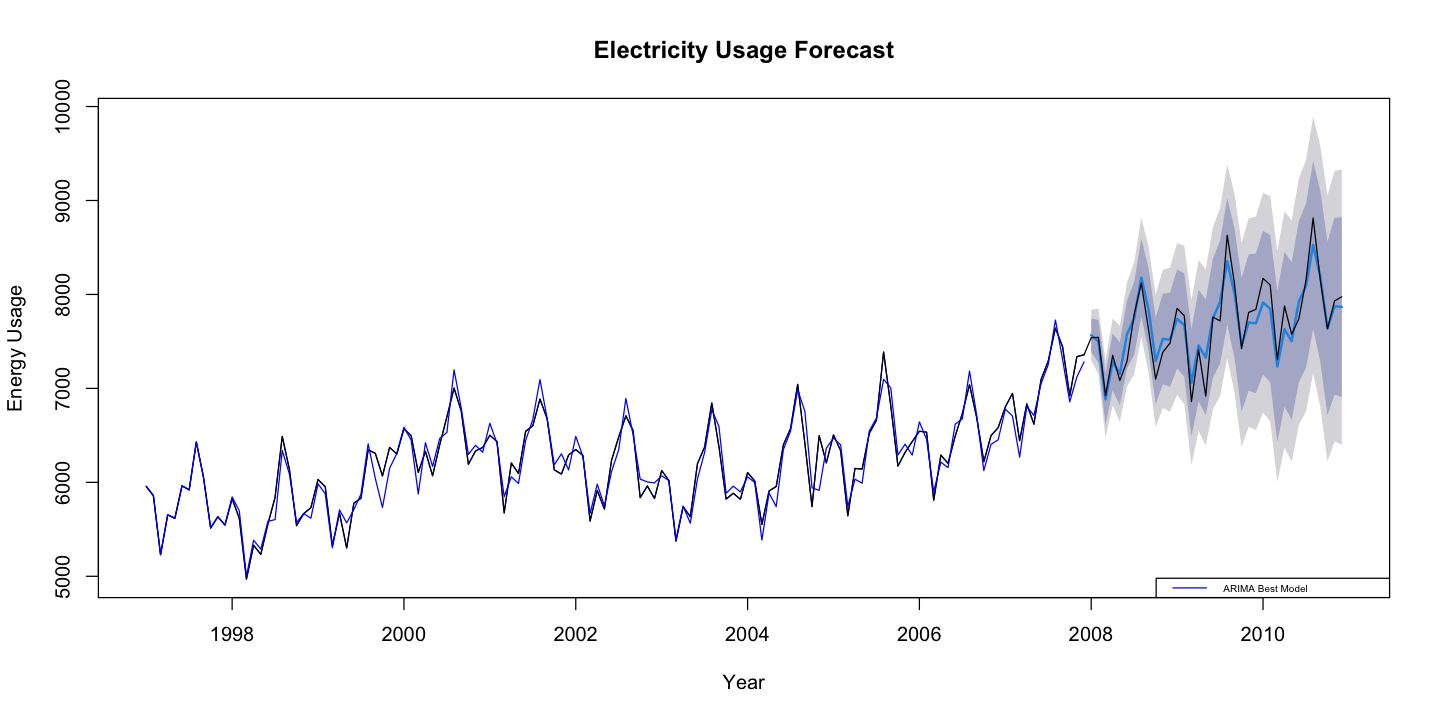

In [35]:
plot(forecast, col = "blue", xlab = 'Year', ylab = 'Energy Usage', main = 'Electricity Usage Forecast')
lines(energy_ts,col = "black")
lines(fitted(forecast), col = 'blue')
legend("bottomright",lty = 1,col = c('blue'), legend = c("ARIMA Best Model"), cex = 0.5)

<div class="alert alert-block alert-warning">
<a id="Discussion"></a>

# Discussion (300 words max.) (3 marks)

Discuss three limitations of this final model, and recommendations to address these limitations. (300 words max.)
<div>


### 3 Limitations & corresponding recommendations:
- **Limitation 1:** ARIMA models are inherently linear, assuming that past values and errors linearly predict future values. However, electricity usage at an airport can be influenced by nonlinear factors such as sudden policy changes, technology upgrades, or unexpected operational disruptions.
- **Recommendation 1:** Integrate machine learning models like Random Forest or Neural Networks that can capture nonlinear relationships. Also, consider a hybrid approach that combines ARIMA with nonlinear modeling techniques to improve forecast accuracy.
- 
- **Limitation 2:** The current ARIMA model does not include external variables like economic indicators, weather conditions, or airport traffic growth rates, all of which can significantly affect energy consumption.
- **Recommendation 2:** Develop a multivariate ARIMA model (ARIMAX) or a Vector Autoregression (VAR) model that can incorporate these external factors as exogenous variables, offering a more nuanced understanding of energy usage drivers.
- 
- **Limitation 3:** The model may not adequately account for structural breaks or changes in the underlying process of energy consumption, such as the introduction of energy-saving technologies or a significant change in airport infrastructure.
- **Recommendation 3:** Implement regime-switching models or structural break tests to identify and adapt to changes in the data-generating process. Regularly update and retrain the model to capture any new patterns due to these breaks.

----

<div class="alert alert-block alert-danger">
<a id="AppendixA"></a>

# Appendix A:
# ETS models (1 mark)
</div>

We use ets() funtion to try out different ETS models, and then calculate AICc values and accuracy measures for each model to determine the best model.

In [36]:
## Models
# ETS(ANN)
model_ANN <- ets(training_set, model="ANN")

# ETS(ANA)
model_ANA <- ets(training_set, model="ANA")

# ETS(AAN)
model_AAN <- ets(training_set, model="AAN")

# ETS(MNN)
model_MNN <- ets(training_set, model="MNN")

# ETS(MNA)
model_MNA <- ets(training_set, model="MNA")

# ETS(MAN)
model_MAN <- ets(training_set, model="MAN")

# ETS(AAA)
model_AAA <- ets(training_set, model="AAA")

# ETS(MAM)
model_MAM <- ets(training_set, model="MAM")

# ETS(MMM)
model_MMM <- ets(training_set, model="MMM")

list_of_models <- list(model_ANN, model_ANA, model_AAN, model_MNN, model_MNA, model_MAN, model_AAA, model_MAM, model_MMM)

In [37]:
# Calculate accuracy measures for each model
accuracy_models <- list(
  ANN = accuracy(forecast(model_ANN, h=36), test_set),
  ANA = accuracy(forecast(model_ANA, h=36), test_set),
  AAN = accuracy(forecast(model_AAN, h=36), test_set),
  MNN = accuracy(forecast(model_MNN, h=36), test_set),
  MNA = accuracy(forecast(model_MNA, h=36), test_set),
  MAN = accuracy(forecast(model_MAN, h=36), test_set),
  AAA = accuracy(forecast(model_AAA, h=36), test_set),
  MAM = accuracy(forecast(model_MAM, h=36), test_set),
  MMM = accuracy(forecast(model_MMM, h=36), test_set)
)
accuracy_models

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,15.83361,361.5207,288.6251,0.01421387,4.689295,1.089220,0.07048133,NA
Test set,359.93181,568.4722,461.0463,4.37060437,5.823356,1.739907,0.40372482,1.157081
,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,12.73609,126.6517,98.09986,0.1709555,1.569775,0.3702114,-0.0144411,NA
Test set,291.09860,386.4068,315.93726,3.6655159,4.009293,1.1922911,0.6651536,0.7933645
,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-21.12649,361.9952,286.1572,-0.5829346,4.668335,1.079906,0.0713604,NA
Test set,-142.63210,405.9065,324.8172,-2.0815563,4.292960,1.225802,0.1978238,0.8420437
,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,16.39401,361.5673,289.0548,0.02466591,4.696447,1.090841,0.06610424,NA


In [38]:
# Calculate AIC values for each model
aic_values <- data.frame(model_ANN$aicc, model_ANA$aicc, model_AAN$aicc, model_MNN$aicc, model_MNA$aicc, model_MAN$aicc, model_AAA$aicc, model_MAM$aicc, model_MMM$aicc)

aic_values

model_ANN.aicc,model_ANA.aicc,model_AAN.aicc,model_MNN.aicc,model_MNA.aicc,model_MAN.aicc,model_AAA.aicc,model_MAM.aicc,model_MMM.aicc
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2205.762,1956.808,2210.397,2203.515,1959.75,2207.177,1961.224,1965.961,1968.135


 Considering AICc values and other forcasting measurements, the best ETS model is ETS(AAA), with Additive error, No trend, and Additive seasonality, capturing the prominent seasonal fluctuations without a significant trend component.

 Explaination:

 1. AAA has the lowest AICc value, indicating best fitting modeling. 

 2. The forcating errors of AAA are lower and the errors across the metrics are more consistent, which suggets the robustness in forecasting performance.

 Therefore, considering both AICc values and forecasting erros, the "AAA" model stands out as the overall best performer among the ETS models considered.




---

<div class="alert alert-block alert-danger">
<a id="AppendixB"></a>

# Appendix B:
# ARIMA Models (1 mark)
</div>

Best model based on AIC: model_011_011 - AIC: 1530.997 
Accuracy measures for model_011_011 :
NULL
                      Model      AIC
model_100_100 model_100_100 1756.780
model_010_010 model_010_010 1576.412
model_001_001 model_001_001 1903.689
model_110_110 model_110_110 1550.245
model_011_011 model_011_011 1530.997
model_110_011 model_110_011 1531.084


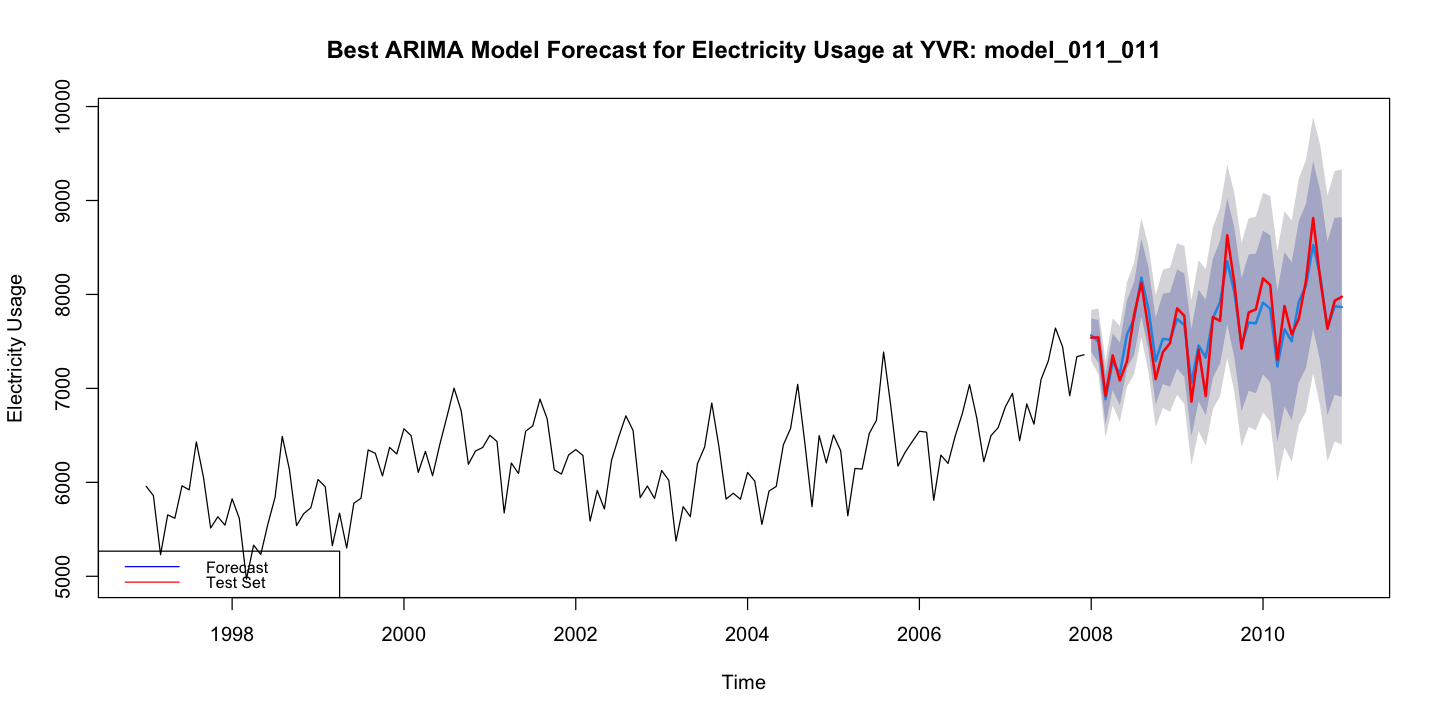

In [39]:
# Fit a selection of ARIMA models including seasonal components
model_100_100 <- Arima(training_set, order=c(1, 0, 0), seasonal=list(order=c(1, 0, 0), period=12))
model_010_010 <- Arima(training_set, order=c(0, 1, 0), seasonal=list(order=c(0, 1, 0), period=12))
model_001_001 <- Arima(training_set, order=c(0, 0, 1), seasonal=list(order=c(0, 0, 1), period=12))
model_110_110 <- Arima(training_set, order=c(1, 1, 0), seasonal=list(order=c(1, 1, 0), period=12))
model_011_011 <- Arima(training_set, order=c(0, 1, 1), seasonal=list(order=c(0, 1, 1), period=12))
model_110_011 <- Arima(training_set, order=c(1, 1, 0), seasonal=list(order=c(0, 1, 1), period=12))

# Generate forecasts and calculate accuracy against the test set
models <- list(model_100_100, model_010_010, model_001_001, model_110_110, model_011_011, model_110_011)
model_names <- c("model_100_100", "model_010_010", "model_001_001", "model_110_110", "model_011_011", "model_110_011")

accuracy_arima <- sapply(models, function(model) {
  forecasted <- forecast(model, h=36)
  accuracy(forecasted, test_set)
}, simplify = FALSE)

# Compare AIC values to select the best model considering simplicity and seasonal adjustment
aics <- sapply(models, AIC)
names(aics) <- model_names

best_model_name <- names(which.min(aics))
best_model_aic <- min(aics)

# Print the best model's name and its AIC value
cat("Best model based on AIC:", best_model_name, "- AIC:", best_model_aic, "\n")

# Print accuracy measures for the best model
cat("Accuracy measures for", best_model_name, ":\n")
print(accuracy_arima[[best_model_name]])

# Plotting the forecast of the best model
best_forecast <- forecast(models[[which.min(aics)]], h=36, level=c(80,95))
plot(best_forecast, main=paste("Best ARIMA Model Forecast for Electricity Usage at YVR:", best_model_name), 
     xlab="Time", ylab="Electricity Usage")
lines(test_set, col="red", lwd=2)
legend("bottomleft", legend=c("Forecast", "Test Set"), col=c("blue", "red"), lty=1:1, cex=0.8)

# Create a dataframe for AIC values for easy comparison
aics_df <- data.frame(Model = model_names, AIC = aics)
print(aics_df)

The ARIMA(0,1,1)(0,1,1)[12] model is chosen for forecasting electricity usage at YVR due to its:

- **Lower AIC Value**: Indicates a more efficient fit to the historical data.
- **Higher Forecast Accuracy**: Shows lower forecast errors compared to ETS and basic methods.
- **Effective Seasonality Handling**: Captures seasonal patterns, crucial for accurate predictions.
- **Well-behaved Residuals**: Residuals exhibit no autocorrelation, suggesting a good model fit.

Therefore, this model is preferred for its balance of simplicity, adaptability, and precision in forecasting, which is essential for operational planning at YVR.